# Classification

In [1]:
import numpy as np
import os
import io
import warnings

In [7]:
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import Perceptron
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, precision_recall_curve, precision_score, recall_score, classification_report, make_scorer
from sklearn.model_selection import cross_validate, cross_val_predict, GridSearchCV
from pprint import pprint

In [11]:
import matplotlib.pyplot as plt

In [5]:
import ssl
import urllib.request

ssl._create_default_https_context = ssl._create_unverified_context

urllib.request.install_opener(
    urllib.request.build_opener(
        urllib.request.HTTPSHandler(context=ssl._create_default_https_context())
    )
)

X, y = fetch_openml('mnist_784', version=1, as_frame=True, return_X_y=True)

print(X.shape, y.shape)

(70000, 784) (70000,)


In [6]:
X = X.to_numpy()
y = y.to_numpy()

In [9]:
target_names = np.unique(y)
print(target_names)

['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']


In [10]:
X = MinMaxScaler().fit_transform(X)
print("Minimum:{0}, Maximum:{1}".format(np.min(X),np.max(X)))

Minimum:0.0, Maximum:1.0


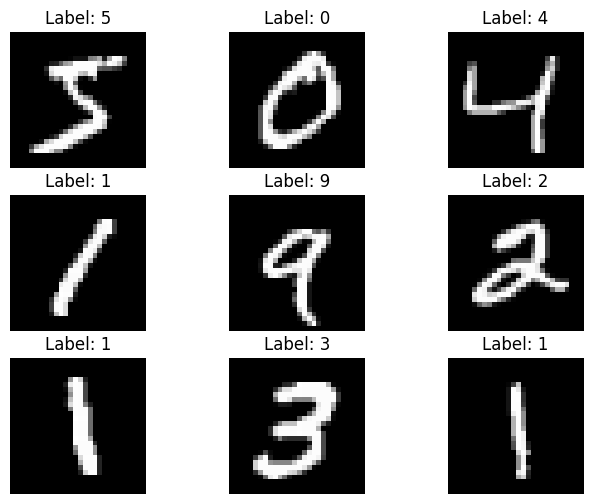

In [14]:
num_images = 9
factor = int(np.sqrt(num_images))
fig, ax = plt.subplots(nrows=factor, ncols=factor, figsize=(8, 6))
idx_offset = 0
for i in range(factor):
    index = idx_offset + i * factor
    for j in range(factor):
        ax[i, j].imshow(X[index + j].reshape(28, 28), cmap='gray')
        ax[i, j].set_title('Label: {0}'.format(str(y[index + j])))
        ax[i, j].set_axis_off()

In [15]:
# Splitting data

x_train, x_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

### 0 detector

In [16]:
y_train_0 = -1*np.ones((len(y_train)))
y_test_0 = -1*np.ones((len(y_test)))

indx_0 = np.where(y_train=='0')
y_train_0[indx_0] = 1

indx_0 = np.where(y_test =='0')
y_test_0[indx_0]=1

In [17]:
num_pos = len(np.where(y_train_0==1)[0])
num_neg = len(np.where(y_train_0==-1)[0])
print(num_pos, num_neg)

5923 54077


In [18]:
base_clf = DummyClassifier(strategy='most_frequent')

In [19]:
base_clf.fit(x_train, y_train_0)
print('Training Accuracy: ', base_clf.score(x_train, y_train_0))
print('Test Accuracy: ',base_clf.score(x_test, y_test_0) )

Training Accuracy:  0.9012833333333333
Test Accuracy:  0.902


## Perceptron

In [20]:
bin_clf = Perceptron(max_iter=100, random_state=1729)

In [22]:
bin_clf.fit(x_train, y_train_0)
print("Dimension of Weights w: ", bin_clf.coef_.shape)
print('Bias: ', bin_clf.intercept_)
print('Loss function: ', bin_clf.loss_function_)

Dimension of Weights w:  (1, 784)
Bias:  [-108.]
Loss function:  <sklearn.linear_model._sgd_fast.Hinge object at 0x14f97eef0>


/Users/satviksawhney/Downloads/IITMadras/MLP (Practical)/.venv/lib/python3.12/site-packages/sklearn/utils/deprecation.py:102: FutureWarning: Attribute `loss_function_` was deprecated in version 1.4 and will be removed in 1.6.
  warnings.warn(msg, category=FutureWarning)


In [23]:
y_hat_train = bin_clf.predict(x_train)
print('Training Accuracy: ', bin_clf.score(x_train, y_train_0))

Training Accuracy:  0.99095


In [24]:
print('Test Accuracy: ', bin_clf.score(x_test, y_test_0))

Test Accuracy:  0.989
